In [25]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import ceil, floor

random.seed(0)

## Finding the most specific/general hypothesis [Warm-UP]

In [3]:
# utilities for creating a dataset

### data structure to represent dataset
class Dataset:
    def __init__(self, x: np.ndarray, y: np.ndarray, n = None):
        # todo: assertion to verify the dimension of x and y
        self.__x = x
        self.__y = y
        self.__n = n if n else len(x)
        
    def __getitem__(self, index: int):
        #todo: assertion to verify out of bounds
        return self.__x[index], self.__y[index]
    
    def __setitem__(self, index: int, x_: np.ndarray, y_: np.ndarray):
        # todo: assertion to verify out of bounds
        self.__x[index] = x_
        self.__y[index] = y_
    
    def __len__(self):
        return self.__n
    
    def __del__(self):
        del(self.__x)
        del(self.__y)
        del(self.__n)
    
    def __iter__(self):
        self.__index = 0
        return self
    
    def __next__(self):
        if (self.__index < self.__n):
            self.__index += 1
            return self[self.__index - 1]
        raise StopIteration

### helper functions
def binary_sampling(p: float) -> int:
    # todo: assertion to verify validity of p
    value = 1 if (random.random() < p) else 0
    return value


def uniform_range_sampling(union_of_ranges: list) -> float:
    # make assertions about correctness of union_of_ranges
    total_length = sum([(upper-lower) for lower, upper in union_of_ranges])
    uniform_sample = random.uniform(0, total_length)

    for lower, upper in union_of_ranges:
        uniform_sample += lower
        if (uniform_sample < upper):
            return uniform_sample
        uniform_sample -= upper

    return None


def x_sampling(x_range: dict, y: np.ndarray):
    x = np.array([[uniform_range_sampling(union_of_ranges) for union_of_ranges in x_range[target]] for target in y])    
    return x

In [4]:
# creating a dataset

### setting up parameters required
n = 30 # dataset-size
p = 0.5 # probability of 1
x_range = {1: [[(2, 7),], [(4, 6),]], 0: [[(0, 2), (7, 9)], [(1, 3), (6, 8)]]}


def create_dataset(n, p, x_range):
    ### generating vector y
    y = np.array([binary_sampling(p) for _ in range(n)])

    ### generating vector x
    x = x_sampling(x_range, y)
    
    return Dataset(x, y)

dataset = create_dataset(n, p, x_range)

In [29]:
# printing the dataset
for x, y in dataset:
    print(x, y)

[1.90803911 7.46123971] 0
[1.04196924 7.22011131] 0
[4.74349652 4.0280834 ] 1
[5.59852343 4.79764708] 1
[8.29937991 6.6726128 ] 0
[2.0057141  4.98715573] 1
[8.4704111  1.97564351] 0
[3.62602181 5.74094246] 1
[2.95533546 5.13502148] 1
[0.95446371 7.870161  ] 0
[8.21271788 2.79187829] 0
[0.32178327 2.28021842] 0
[4.53970321 5.86566765] 1
[0.43623138 6.20506898] 0
[7.82624564 6.18976365] 0
[6.07233432 5.08056721] 1
[8.85535418 6.41274251] 0
[7.35046826 2.77995611] 0
[7.38514745 2.53960458] 0
[7.30260406 2.16131801] 0
[2.94695664 4.37345906] 1
[7.45109272 6.62663756] 0
[1.90612397 1.35929744] 0
[8.03041569 7.50708148] 0
[6.61690508 5.68492045] 1
[6.49086561 5.84616488] 1
[4.70299962 4.7825921 ] 1
[7.8211336  2.10253649] 0
[8.24651483 7.39794386] 0
[8.58015587 6.35920473] 0


#### 1. Plotting the dataset

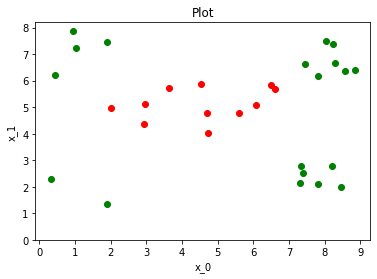

In [28]:
### setting up parameters required
color_code = {1: 'red', 0: 'green'}

### function for plotting dataset
def plot_dataset(dataset: Dataset):
    x_scale = [0, 0]
    y_scale = [0, 0]

    for x, y in dataset:
        plt.scatter(*x, color = color_code[y])
        x_scale[0] = min(x_scale[0], x[0])
        x_scale[1] = max(x_scale[1], x[0])
        y_scale[0] = min(y_scale[0], x[1])
        y_scale[1] = max(y_scale[1], x[1])

    x_scale = [floor(x_scale[0]), ceil(x_scale[1])+1]
    y_scale = [floor(y_scale[0]), ceil(y_scale[1])+1]

    plt.title('Plot')
    plt.xlabel('x_0')
    plt.ylabel('x_1')

    plt.xticks(range(*x_scale, 1))
    plt.yticks(range(*y_scale, 1))

    plt.show()

plot_dataset(dataset)

#### 2. Finding and Plotting most general and specific hypothesis

In [ ]:
'''
A rectagle can be uniquely identified by a pair of diagonally opposite vertices
'''